In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import  KFold,learning_curve, cross_val_score
from sklearn.cross_validation import StratifiedKFold, LeaveOneOut

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV


In [2]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [3]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataframe.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

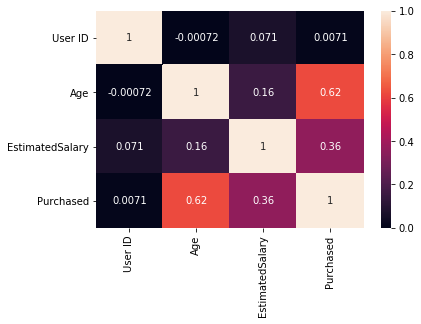

In [5]:
sns.heatmap(dataframe.corr(),annot=True)

In [6]:
dataframe = dataframe.drop(['User ID'],axis=1)

In [7]:
dataframe.sample()

,Gender,Age,EstimatedSalary,Purchased
211,Male,52,150000,1


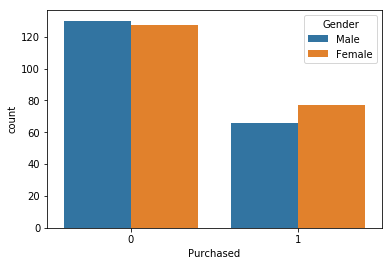

In [8]:
sns.countplot('Purchased',hue='Gender',data=dataframe)

/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x720 with 0 Axes>

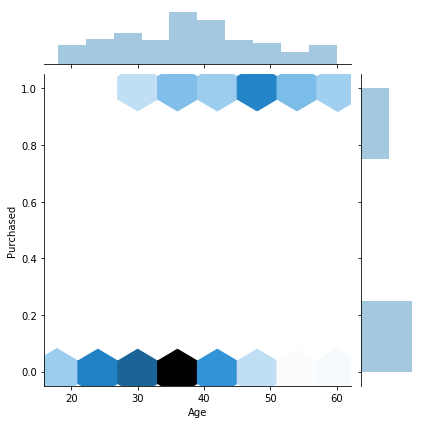

In [9]:
plt.figure(figsize=(20,10))
sns.jointplot('Age','Purchased',kind='hex',data=dataframe)

/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


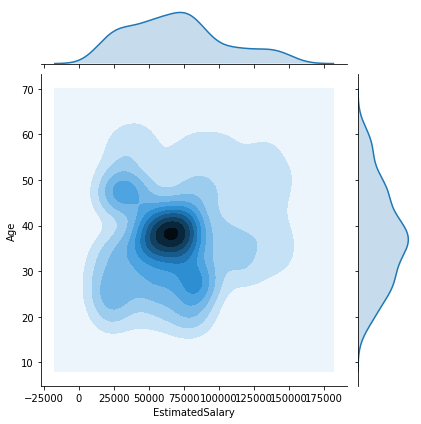

In [10]:
sns.jointplot('EstimatedSalary','Age',kind='kde',data=dataframe)

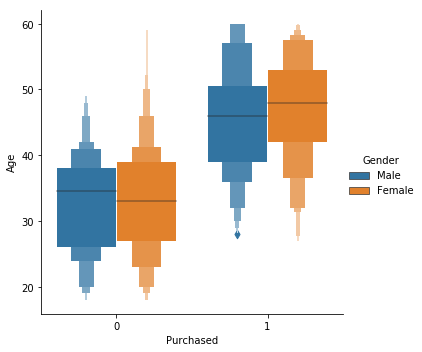

In [11]:
sns.catplot('Purchased','Age',hue='Gender',kind="boxen",data=dataframe)

<Figure size 1440x720 with 0 Axes>

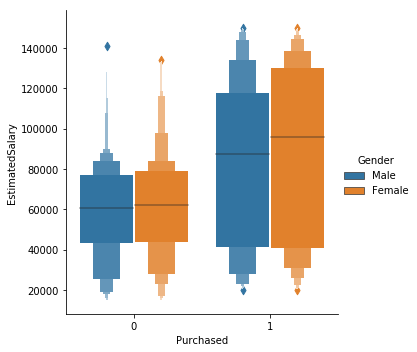

In [12]:
plt.figure(figsize=(20,10))
sns.catplot('Purchased','EstimatedSalary',hue='Gender',kind="boxen",data=dataframe)

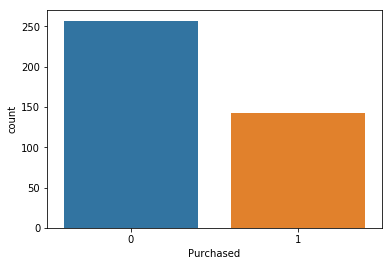

In [13]:
sns.countplot('Purchased',data=dataframe)

In [14]:
category = dataframe['Gender']

In [15]:
lb = LabelBinarizer()

In [16]:
Cat = lb.fit_transform(category)

In [17]:
dataframe['Gender'].nunique()

2

In [18]:
# one hot encoder for all the categorical
def one_Hot_Label_Binarize(cols,dataframe):
    filename = 'one_hot_encoder'
    file_format = 'pkl'
    for col in cols:
        n_col = dataframe[col].nunique()
        ll=LabelBinarizer()
        filename+=col
        if n_col>2 :
            ll.fit(dataframe[col])
            

In [19]:
dataframe['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
dataframe['Gender'] = Cat

In [21]:
dataframe.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [22]:
Y = dataframe['Purchased']

In [23]:
X = dataframe.drop(['Purchased'],axis=1)

In [43]:
kf = KFold(n_splits=5, random_state=None, shuffle=False)

In [44]:
for i,j in kf.split(X):
    print(i,'\n',j)

[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 32

In [ ]:
regressor = LogisticRegression()

In [ ]:
# count=0
# for train,test in kf.split(X.values):
# #     print('i= {}\nj={}\n'.format(train,test))
#     print(count+=1)
#     X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]


In [ ]:
# Checking accuracy on various models
scores = cross_val_score(X=X,y=Y,cv=kf,scoring='accuracy',n_jobs=-1,estimator=regressor)

In [ ]:
print('The scores are: {}\n The accuracy using cross_val_score is : {}'.format(scores,np.mean(scores)*100))

In [ ]:
# plt.plot(np.arange(),np.sort(scores))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Trying on Train_test_Split to see any diffrence in both types
reg2 = LogisticRegression(random_state=0)
reg2.fit(X_train,y_train)
ypred = reg2.predict(X_test)
print('Accuracy with train test split is :{}'.format(accuracy_score(y_test,ypred)))

In [ ]:
def plot_learning_curve(estimator,X,Y,cv,n_jobs,scoring):
    test_size, train_error, valid_error = learning_curve(estimator=estimator,X=X,y=Y,cv=kf,n_jobs=n_jobs,scoring=scoring)
    train_error_means = -np.mean(train_error,axis=1)
    valid_error_means = -np.mean(valid_error,axis=1)
    title=str(estimator)+str(cv)
    plt.plot(test_size,train_error_means,color='r',label='training error')
    plt.plot(test_size,valid_error_means,color='g',label='validation error')
    plt.legend(loc='best')
    plt.xlabel('train_sizes')
    plt.ylabel('error values')
    plt.title(title)
    plt.figure(figsize=(10,10))
    plt.show()

In [ ]:
plot_learning_curve(estimator=LogisticRegression(),X=X,Y=Y,cv=kf,n_jobs=5,scoring='accuracy')

# As we see training of the learning curve  

In [ ]:
algos = [MLPClassifier(activation='logistic',hidden_layer_sizes=5,batch_size=80,shuffle=True),
        GradientBoostingClassifier(learning_rate=0.01,max_leaf_nodes=8,n_estimators=5,criterion='mse',min_samples_split=5),
         LogisticRegressionCV(Cs=2,refit=True,solver='liblinear',dual=False)
        ]

In [ ]:
for item in algos:
    plot_learning_curve(estimator=item,X=X,Y=Y,cv=kf,n_jobs=5,scoring='accuracy')